In [16]:
import json as js
import glob
import sys

In [17]:
import pandas as pd
import numpy as np

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.feature_extraction import text 
from sklearn.cluster import KMeans, MiniBatchKMeans

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
%matplotlib inline
import seaborn as sns

In [20]:
import numpy as np
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool

In [21]:
import os
from copy import deepcopy
import time
import datetime

In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/hamid/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
additional_stop_words = ['rt','t','http','u','s','follow','m','dm','y'] ##USE THIS FOR STOP WORDS
stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

In [24]:
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in tokenizer.tokenize(doc)]

In [31]:
directory = './tweets/*'
#for windows could be: directory = 'C:/Users/hza0020/tweets/*'

## LOAD TWEET OBJECTS

In [32]:
tweet_objects = []
dirs = glob.glob(directory)
for dr in dirs:
    files = glob.glob(dr+'/*')
    for f in files:
            fin = open(f,'r')
            for line in fin:
                try:
                    dat = js.loads(line)
                    tweet_objects.append(dat)
                except:
                    continue
            fin.close()

## EXTRACT DATA AND EXPORT TO TEMPORARY FILE

In [33]:
fout = open('tmp.dat','w')
for ln in tweet_objects:
    try:
        entities = ln['entities']
        hashtags = entities['hashtags']
        user_mentions = entities['user_mentions']
    except KeyError:
        continue
    for hashtag in hashtags:
        try:
            hashtag = hashtag['text']
            date = ln['created_at']
            date = date.split()
            #print date
            date = str(date[1])+'-'+str(date[2])+'18_'+str(date[3])
            favorite_count = ln['favorite_count']
            user = ln['user']
            followers = user['followers_count']
            username = user['screen_name']
            location = user['location']
            txt = ln['text'].replace('\n','')
            fout.write(date + '\t' + str(favorite_count)+','+str(followers)+',"'+str(username)+'","'+str(location)+'","'+str(txt)+'"\n')
        except UnicodeEncodeError:#.encode('utf-8')
            continue
fout.close()

## OPEN TMP FILE AS DATAFRAME

In [34]:
df = pd.read_csv('tmp.dat',error_bad_lines=False,header=None,names=\
                 ['date','followers','username','location','tweet'],\
                 delimiter=',',index_col=False)#windows users might add this inside of parentheses: ,encoding='latin-1'
df.shape[0]
df.drop_duplicates(inplace=True)

In [35]:
#if rm_duplicates == False:
#    df['rt'] = df['tweet'].str.split(':', expand=True).ix[:,0]
#    df.drop_duplicates(subset=['rt'], keep='first',inplace=True)
#    df.rt.head()
#    df.shape[0]

In [36]:
df.shape[0]

19202

In [37]:
df.head(25)

,date,followers,username,location,tweet
0,Sep-1318_05:15:47\t0,2670,drhiot,"Newport Beach, CA",RT @HeinzVHoenen: #AI #MachineLearningMore tha...
2,Sep-1318_06:40:20\t0,7430,Harry_Robots,"Renton, WA",Xbox One S vs PS4 Pro: Which is better?: #Deep...
5,Sep-1318_13:22:26\t0,15265,SavarjeetSingh2,India,RT @Abhaykumar422: Retrain #Azure #MachineLear...
7,Sep-1218_03:00:10\t0,630,geekFreak75,None,RT @JeffreyBuskey: If artificial intelligence ...
8,Sep-1218_14:25:20\t0,3257,machinelearn_d,The Earth,RT @FDleaders: Will the increasing prominence ...
12,Sep-1218_23:05:15\t0,8723,nschaetti,"Nyon, Suisse",#MachineLearning algorithms used to find radio...
15,Sep-1318_01:44:44\t0,1438,business_savyy,None,RT @ahmedjr_16: 18 Best #ArtificialIntelligenc...
19,Sep-1318_03:47:34\t0,585,rottamotta,None,RT @Fisher85M: Updated Technology Timeline to ...
27,Sep-1318_15:30:29\t0,583,linked_do,"Berlin, Germany",RT @Connected_Data: Join our partner @GOTOber ...
30,Sep-1218_02:25:28\t0,3246,machinelearn_d,The Earth,RT @BigDataCXO: An important topic and one clo...


## REMOVING TWEETS FROM DATASET

In [38]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Certain words can be used in order to filter such tweets.
*** Enter these words below in the bad_terms list.
'''
bad_terms = ['cock','ManiKENniMonica','nudes']
for i in range(len(bad_terms)):
    df.bad = df['tweet'].str.lower().str.contains(bad_terms[i].lower())
    df = df[df.bad == False]

/Users/hamid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/Users/hamid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  
/Users/hamid/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


## CLUSTERING USING K-MEANS

In [39]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [40]:
n_features = 300
n_topics = 5
n_top_words = 10
n_top_tweets = 15
ngram = 3

In [41]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5,max_features=n_features,stop_words=stop_words,\
                                  ngram_range=(1,2),tokenizer=LemmaTokenizer())
tfidf = tfidf_vectorizer.fit_transform(df.tweet)

In [42]:
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [43]:
km = KMeans(n_clusters=n_topics, init='k-means++', max_iter=100, n_init=1, verbose=True)
km.fit(tfidf)

Initialization complete
Iteration  0, inertia 30768.645
Iteration  1, inertia 17386.445
Iteration  2, inertia 17280.340
Iteration  3, inertia 17248.660
Iteration  4, inertia 17225.342
Iteration  5, inertia 17191.075
Iteration  6, inertia 17159.082
Iteration  7, inertia 17106.044
Iteration  8, inertia 16922.517
Iteration  9, inertia 16900.516
Iteration 10, inertia 16900.438
Iteration 11, inertia 16900.419
Iteration 12, inertia 16900.417
Converged at iteration 12: center shift 0.000000e+00 within tolerance 3.157442e-07


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)

In [44]:
kmeans_embedding = km.transform(tfidf)
kmeans_embedding = -(kmeans_embedding - kmeans_embedding.mean(axis=0))/kmeans_embedding.std(axis=0)

In [45]:
#top_idx = np.argsort(kmeans_embedding,axis=0)[-10:]
preds = km.predict(tfidf)
count = 0
for i in range(n_topics):#, idxs in enumerate(top_idx.T): 
    print("Topic {}:".format(count))
    topic = km.cluster_centers_[i]
    print(" ".join([str(tfidf_feature_names[i])+'\n' for i in topic.argsort()[:-n_top_words - 1:-1]]))
    ct = 0
    top_tweets = []
    t = 0
    for t in range(len(preds)):
    #while ct != n_top_tweets & t<:
        if preds[t] == i:
            top_tweet = df.iloc[t]['tweet']
            if top_tweet not in top_tweets:
                print(top_tweet)
                top_tweets.append(top_tweet)
                ct += 1
        if ct == n_top_tweets:
            break
        t += 1
    count += 1
    print('\n\n')

Topic 0:
machinelearning
 ai
 deeplearning
 bigdata
 learning
 ai machinelearning
 datascience
 machine
 data
 machine learning

Xbox One S vs PS4 Pro: Which is better?: #DeepLearning #IoT #BigData copy: @MIKEQUINDAZZI https://t.co/roHwA3Ggjl https://t.co/Xbls7pdYux
RT @Abhaykumar422: Retrain #Azure #MachineLearning by @Anouarbenzahra cc @CsharpCorner https://t.co/V3qQWafBat https://t.co/o9II5aJNQC
#MachineLearning algorithms used to find radio bursts in SETI initiative - Military Embedded Systems #AI #IA… https://t.co/zEzkD0S2ew
RT @Fisher85M: Updated Technology Timeline to 2020 {Infographic}#AI #blockchain #deeplearning #Robotics #sdx #IoT #biotech #fintech #marte…
RT @Connected_Data: Join our partner @GOTOber on Oct 29–Nov 2 covering Applied AI + #MachineLearning, #Software Architecture, #IoT + more!…
RT @BigDataCXO: An important topic and one close to my heart #MachineLearning #Cybersecurity https://t.co/ctcKWvYtrO
RT @LudewigMM: AI is fueling smarter collaboration | ZDNet https://

## T-SNE Visualization

In [46]:
tsne = TSNE(random_state=0,metric='jaccard',init='pca',perplexity=20.) #TODO: TRY DIFFERENT DISTANCE METRICS!!
tsne_embedding = tsne.fit_transform(kmeans_embedding)
tsne_embedding = pd.DataFrame(tsne_embedding,columns=['x','y'])
tsne_embedding['hue'] = kmeans_embedding.argmax(axis=1) 

In [48]:
topics = [i+1 for i in range(n_topics)]
topics = ['deeplearning','artificialintelligence','machinelearning','nerualnetworks','reinforcementlearning']

In [49]:
cmap = matplotlib.cm.get_cmap('nipy_spectral_r')

In [50]:
colors = []
for i in range(n_topics):
    val = (float(i))/(n_topics-1)
    colors.append(cmap(val))

In [51]:
legend_list = []
for i in range((n_topics)):   
    color = colors[i]
    legend_list.append(mpatches.Ellipse((0, 0), 1, 1, fc=color))

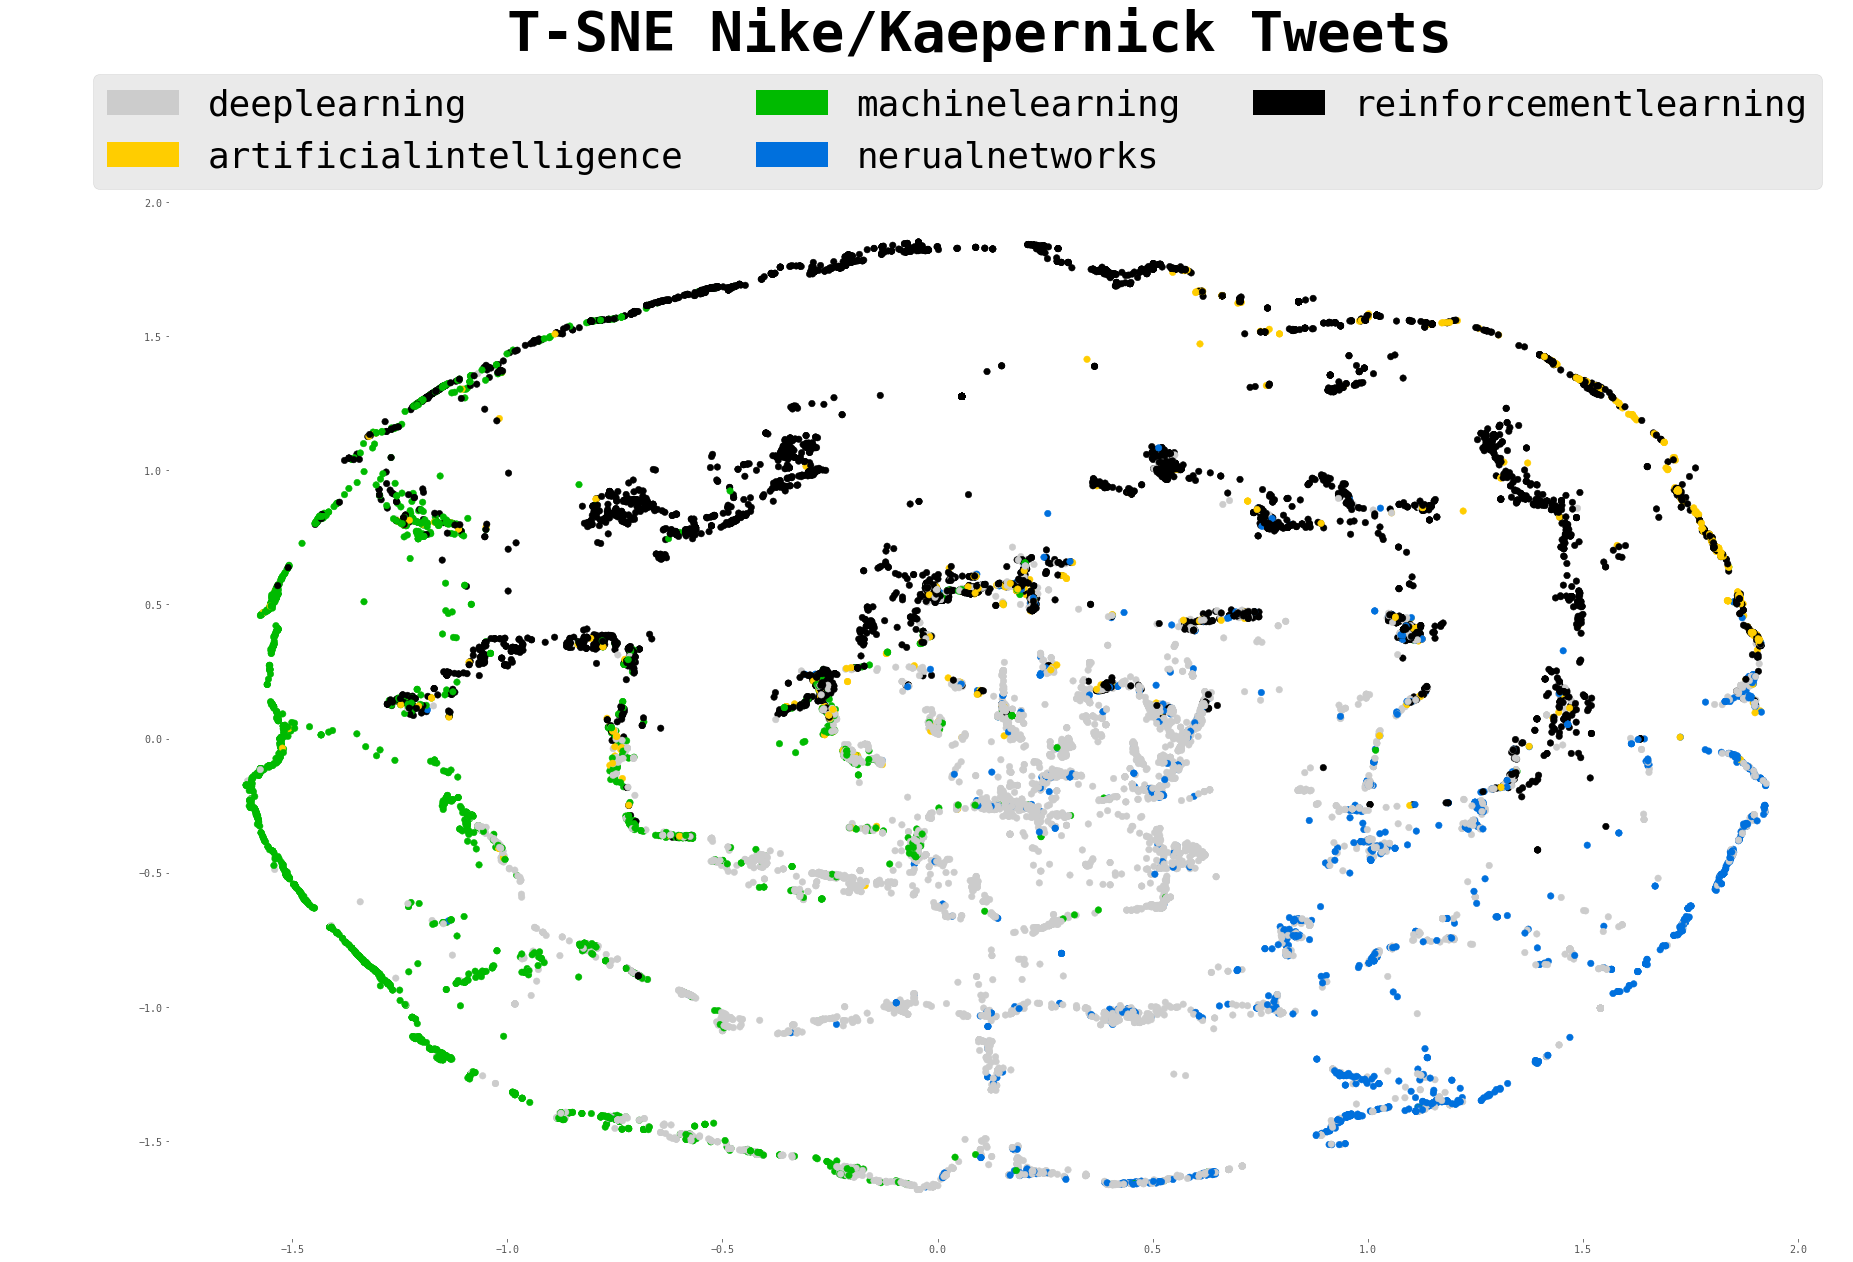

In [52]:
matplotlib.rc('font',family='monospace')
plt.style.use('ggplot')
fig, axs = plt.subplots(1,1, figsize=(30, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=0)
axs.set_facecolor('white')
count = 0
legend = []
data = tsne_embedding
scatter = axs.scatter(data=data,x='x',y='y',s=42,c=data['hue'],cmap='nipy_spectral_r')
plt.suptitle("T-SNE Nike/Kaepernick Tweets",**{'fontsize':'56','weight':'bold'},ha='center')
#plt.figtext(.51,0.95,'LDA topic clusters reduced to 2-d with t-SNE  ', **{'fontsize':'46','weight':'light'}, ha='center')
fig.legend(legend_list,topics,loc=(0.05,0.85),ncol=3,fontsize=36)
plt.subplots_adjust(top=0.85)
plt.show()
#plt.savefig('K-means_T-SNE_visualization.png') #enter filename here to save vizualization to file

([<matplotlib.axis.XTick at 0x1a49bf4668>,
 <a list of 5 Text xticklabel objects>)

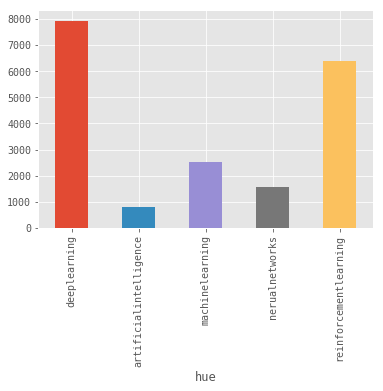

In [53]:
freq = tsne_embedding.groupby('hue').count()
fig, ax = plt.subplots()
indices = [i for i in range(n_topics)]
freq['x'].plot(ax=ax, kind='bar')
plt.xticks(indices, topics)
#plt.savefig('K-means_cluster_size_comparison.png',transparent=True)